Exercise A

In [232]:
import numpy as np

In [233]:
def cooling_scheme(k):
    return 1 / np.sqrt(1 + k)

In [234]:
def initialize_route_fixed_start(n):
    route = np.random.permutation(range(1, n))  
    return np.concatenate(([0], route, [0]))

In [235]:
def compute_costs(points):
    n = len(points)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = np.linalg.norm(np.array(points[i]) - np.array(points[j]))
    return A

In [236]:
def compute_energy(A, path):

    cost = 0

    for element in range(len(path) - 1):

        cost = cost + A[path[element], path[element + 1]]

    return cost


In [237]:
def simulated_annealing(A, num_iter, path_init):

    X = path_init
    cost = np.zeros(num_iter)
    for k in range(num_iter):

        T = cooling_scheme(k)
        Y = initialize_route_fixed_start(A.shape[0])

        diff_energy = compute_energy(A, Y) - compute_energy(A, X)

        u = np.random.uniform(0, 1)
        if diff_energy <= 0:
            X = Y
        elif u < np.exp( - diff_energy / T):
            X = Y

        cost[k] = compute_energy(A, X)

    return X , cost


In [238]:
# Main
# np.random.seed(42)

num_points = 10
points = [[np.random.rand(), np.random.rand()] for _ in range(num_points)]
A = compute_costs(points)
n = len(points)

path_init = initialize_route_fixed_start(n)
num_iter = 500000

print("Initial path:", path_init)
best_path, cost = simulated_annealing(A, num_iter, path_init)
print("Best path found:", best_path)
print("Total cost:", compute_energy(A, best_path))

Initial path: [0 8 2 5 7 1 4 6 9 3 0]
Best path found: [0 8 9 2 1 5 7 4 3 6 0]
Total cost: 2.935066096076793


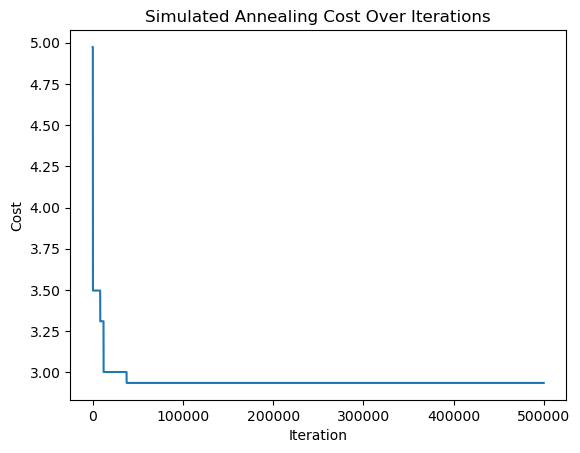

In [239]:
import matplotlib.pyplot as plt

plt.plot(cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Simulated Annealing Cost Over Iterations')
plt.show()

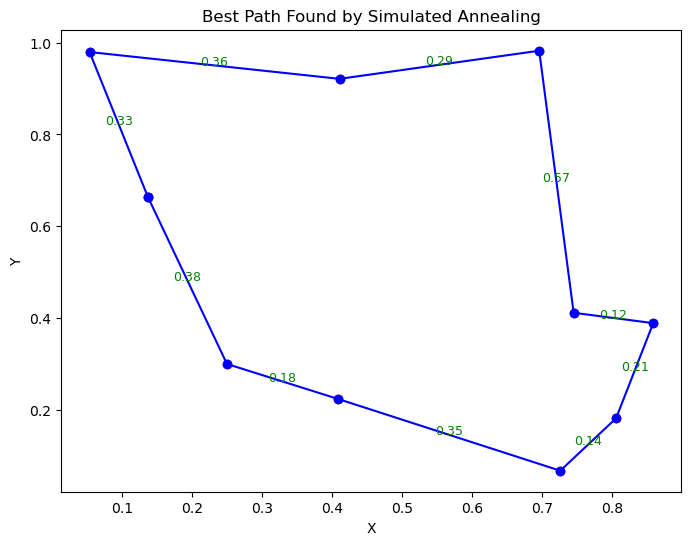

In [240]:
x = [points[i][0] for i in best_path]
y = [points[i][1] for i in best_path]

plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.scatter([points[i][0] for i in range(n)], [points[i][1] for i in range(n)], color='red')

# Annotate each segment with its cost
for i in range(len(best_path) - 1):
    x_mid = (points[best_path[i]][0] + points[best_path[i+1]][0]) / 2
    y_mid = (points[best_path[i]][1] + points[best_path[i+1]][1]) / 2
    cost_val = A[best_path[i], best_path[i+1]]
    plt.text(x_mid, y_mid, f"{cost_val:.2f}", color='green', fontsize=9, ha='center')

plt.title('Best Path Found by Simulated Annealing')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Exercise B